<h1 style="text-align: center;">⚙️ Predictive Maintenance System</h1>

## 🧰 Importing Libraries

In [1]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib for creating plots and visualizations
import matplotlib.pyplot as plt

# Import seaborn for advanced and aesthetically pleasing visualizations
import seaborn as sns

# Import missingno to visualize missing (null) data
import missingno as msno

# Import typing tools to specify type hints in function definitions
from typing import List, Dict, Optional, Union, Any

# Import RobustScaler from scikit-learn
# Used to scale features while minimizing the effect of outliers
from sklearn.preprocessing import RobustScaler

# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Import Random Forest classifier model
from sklearn.ensemble import RandomForestClassifier

# Import XGBOOST classifier model
from xgboost import XGBClassifier

# Import Pipeline to chain preprocessing and modeling steps together
from sklearn.pipeline import Pipeline

# Import model selection tools:
# - train_test_split: to split data into training and testing sets
# - GridSearchCV: for hyperparameter tuning
# - cross_val_score: for cross-validation scoring
# - StratifiedKFold: for stratified cross-validation splits
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

# Import evaluation metrics for classification models
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# Import RocCurveDisplay to visualize ROC curves
from sklearn.metrics import RocCurveDisplay

# Import learning_curve to analyze model performance with varying training sizes
from sklearn.model_selection import learning_curve

# Import NumPy for numerical computations and array operations
import numpy as np

# Import joblib for saving and loading machine learning models
import joblib

# Import json for writing and reading JSON files (e.g., feature names)
import json



## 📊 Exploratory Data Analysis (EDA)

In [2]:
# Loading data
data = pd.read_csv('dataset.csv')

# Display sample of data
data.sample(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
6267,6268,L53447,L,300.8,310.4,1570,35.2,23,0,0,0,0,0,0
589,590,L47769,L,297.6,309.4,1491,40.2,231,0,0,0,0,0,0
6708,6709,M21568,M,301.4,310.6,1464,37.4,74,0,0,0,0,0,0
1097,1098,H30511,H,296.9,307.5,1397,48.3,22,0,0,0,0,0,0
3603,3604,L50783,L,301.7,310.7,1542,40.0,188,0,0,0,0,0,0


In [3]:
# Data size
data.shape

(10000, 14)

In [4]:
# Display basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
# Dataframe summarizing missing values per column
# (column name , non null values count , null values count , percentage of nulls)
nulls = pd.DataFrame(
    {"count"    : data.count(),
     "count of nulls"     : data.isna().sum(),
     "percentage of nulls" :
                (data.isna().sum() / len(data) * 100).round()}
    ).reset_index().rename(columns = {'index' : 'column name'})

nulls


,column name,count,count of nulls,percentage of nulls
0,UDI,10000,0,0.0
1,Product ID,10000,0,0.0
2,Type,10000,0,0.0
3,Air temperature [K],10000,0,0.0
4,Process temperature [K],10000,0,0.0
5,Rotational speed [rpm],10000,0,0.0
6,Torque [Nm],10000,0,0.0
7,Tool wear [min],10000,0,0.0
8,Machine failure,10000,0,0.0
9,TWF,10000,0,0.0


<Axes: >

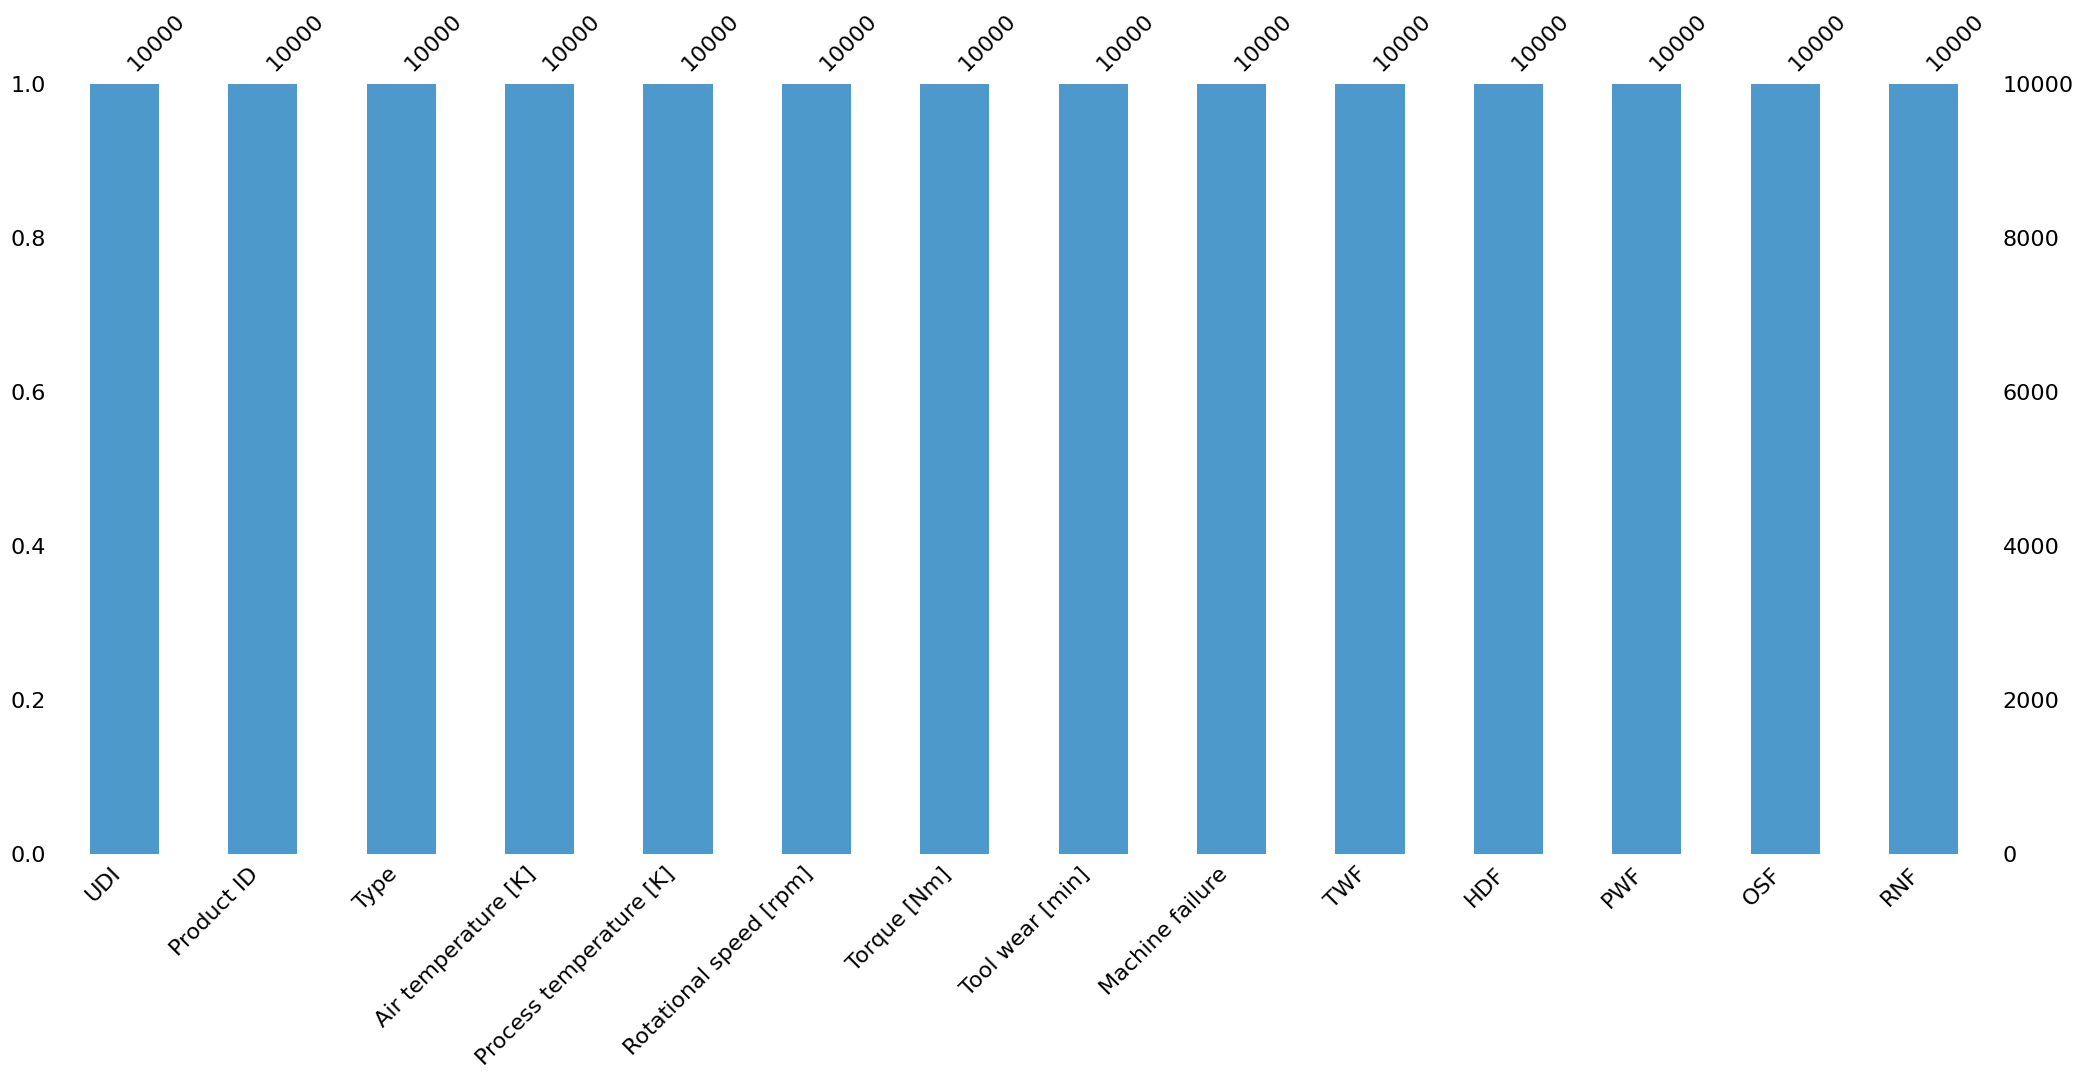

In [6]:
# Visualize the count of non-missing and missing values per column
msno.bar(data,
            color=(0.3, 0.6, 0.8))

<Axes: >

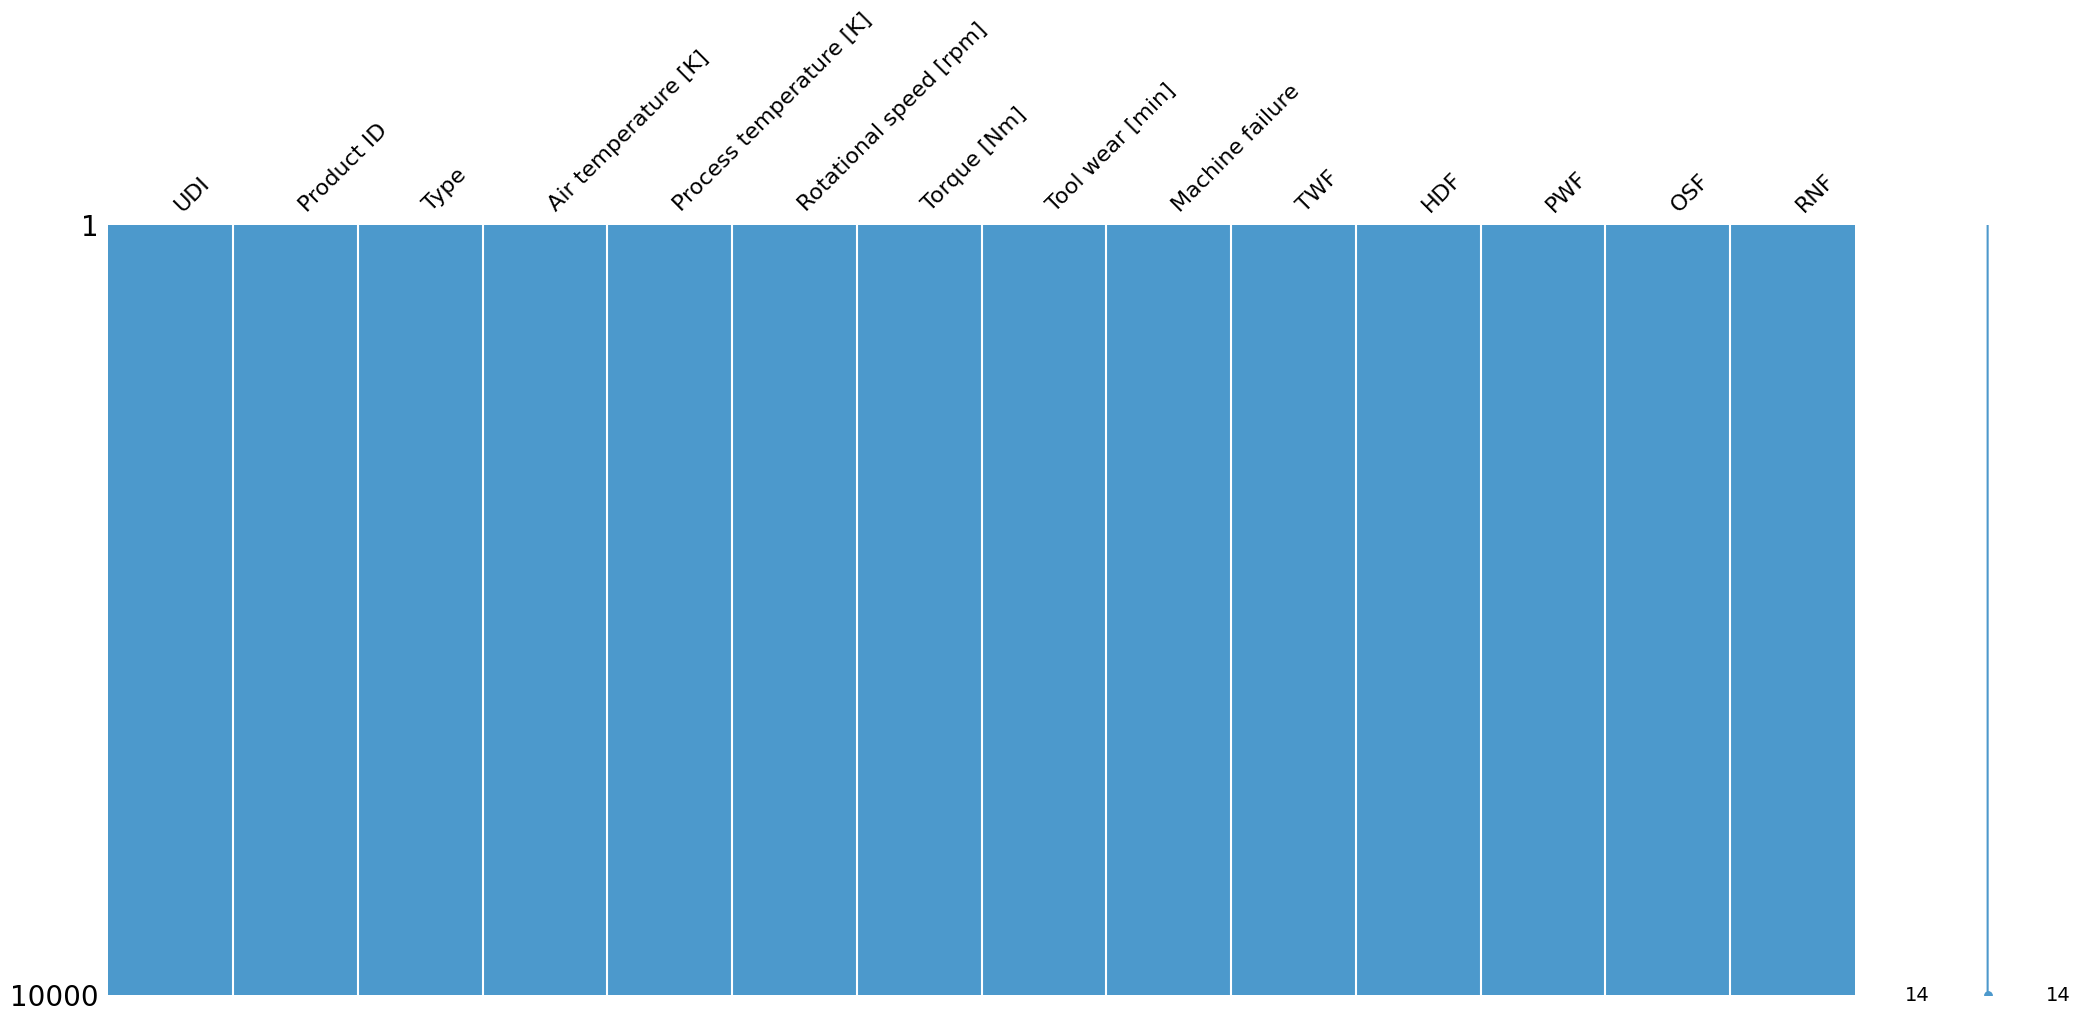

In [7]:
# Another visualization of missing values across the dataset
msno.matrix(data,
            color=(0.3, 0.6, 0.8))

In [8]:
# Display statistical summary of categorical columns
data.describe(include = 'object')

,Product ID,Type
count,10000,10000
unique,10000,3
top,L57163,L
freq,1,6000


In [9]:
# Display unique values for Type column
data['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

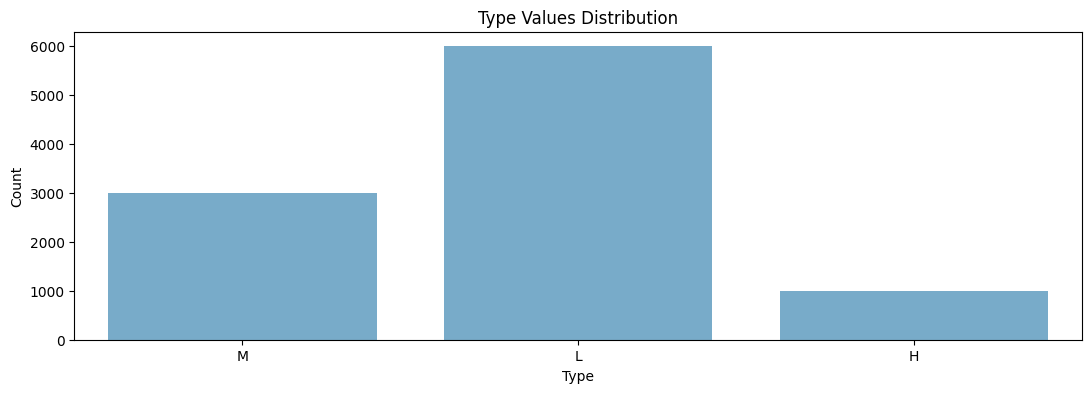

In [10]:
# Countplot figure to display distribution of Type value

# figure size
plt.figure(figsize = (13 , 4))

# countplot  figure
sns.countplot(data,
              x = 'Type',
              color = '#6BAED6')

# title and labels
plt.title('Type Values Distribution')
plt.xlabel('Type')
plt.ylabel('Count')

plt.show()

In [11]:
# Display statistical summary of numerical columns
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


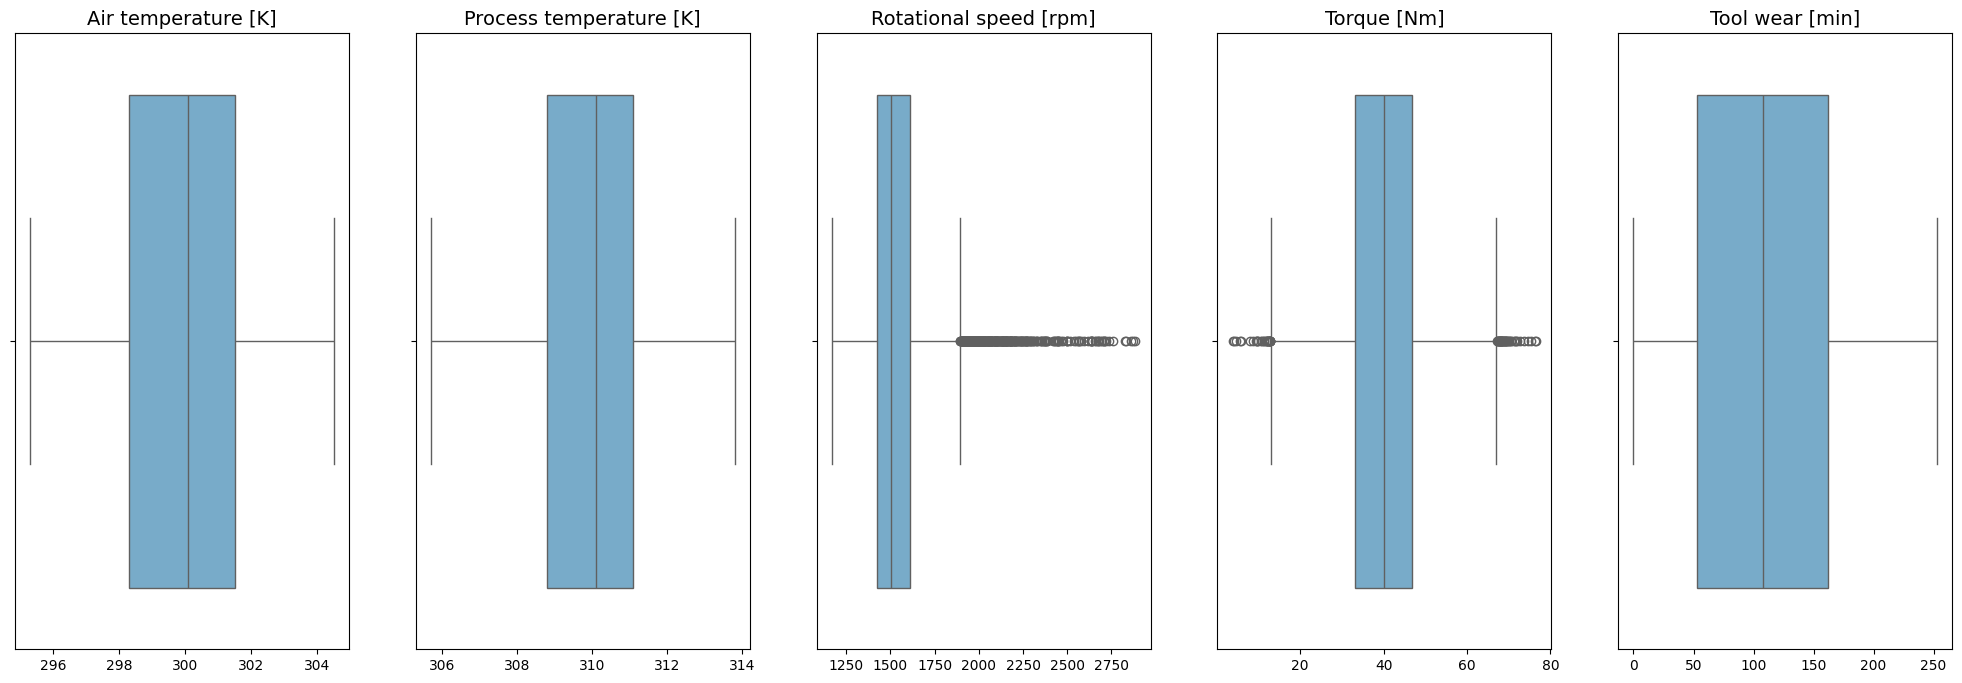

In [12]:
# Visualizations for numerical columns to check outliers

# Select numerical columns
numerical_columns = data[['Air temperature [K]',
                          'Process temperature [K]',
                          'Rotational speed [rpm]',
                          'Torque [Nm]',
                          'Tool wear [min]']]

# Create figure for boxplots
plt.figure(figsize=(25, 8))

# Loop through each numerical column and plot its boxplot
for index, column in enumerate(numerical_columns.columns.tolist()):
    plt.subplot(1, len(numerical_columns.columns), index + 1)
    sns.boxplot(data = data,
                x = column,
                color = '#6BAED6')
    plt.title(column,
              fontsize = 14)
    plt.xlabel('')
    plt.ylabel('')

plt.show()


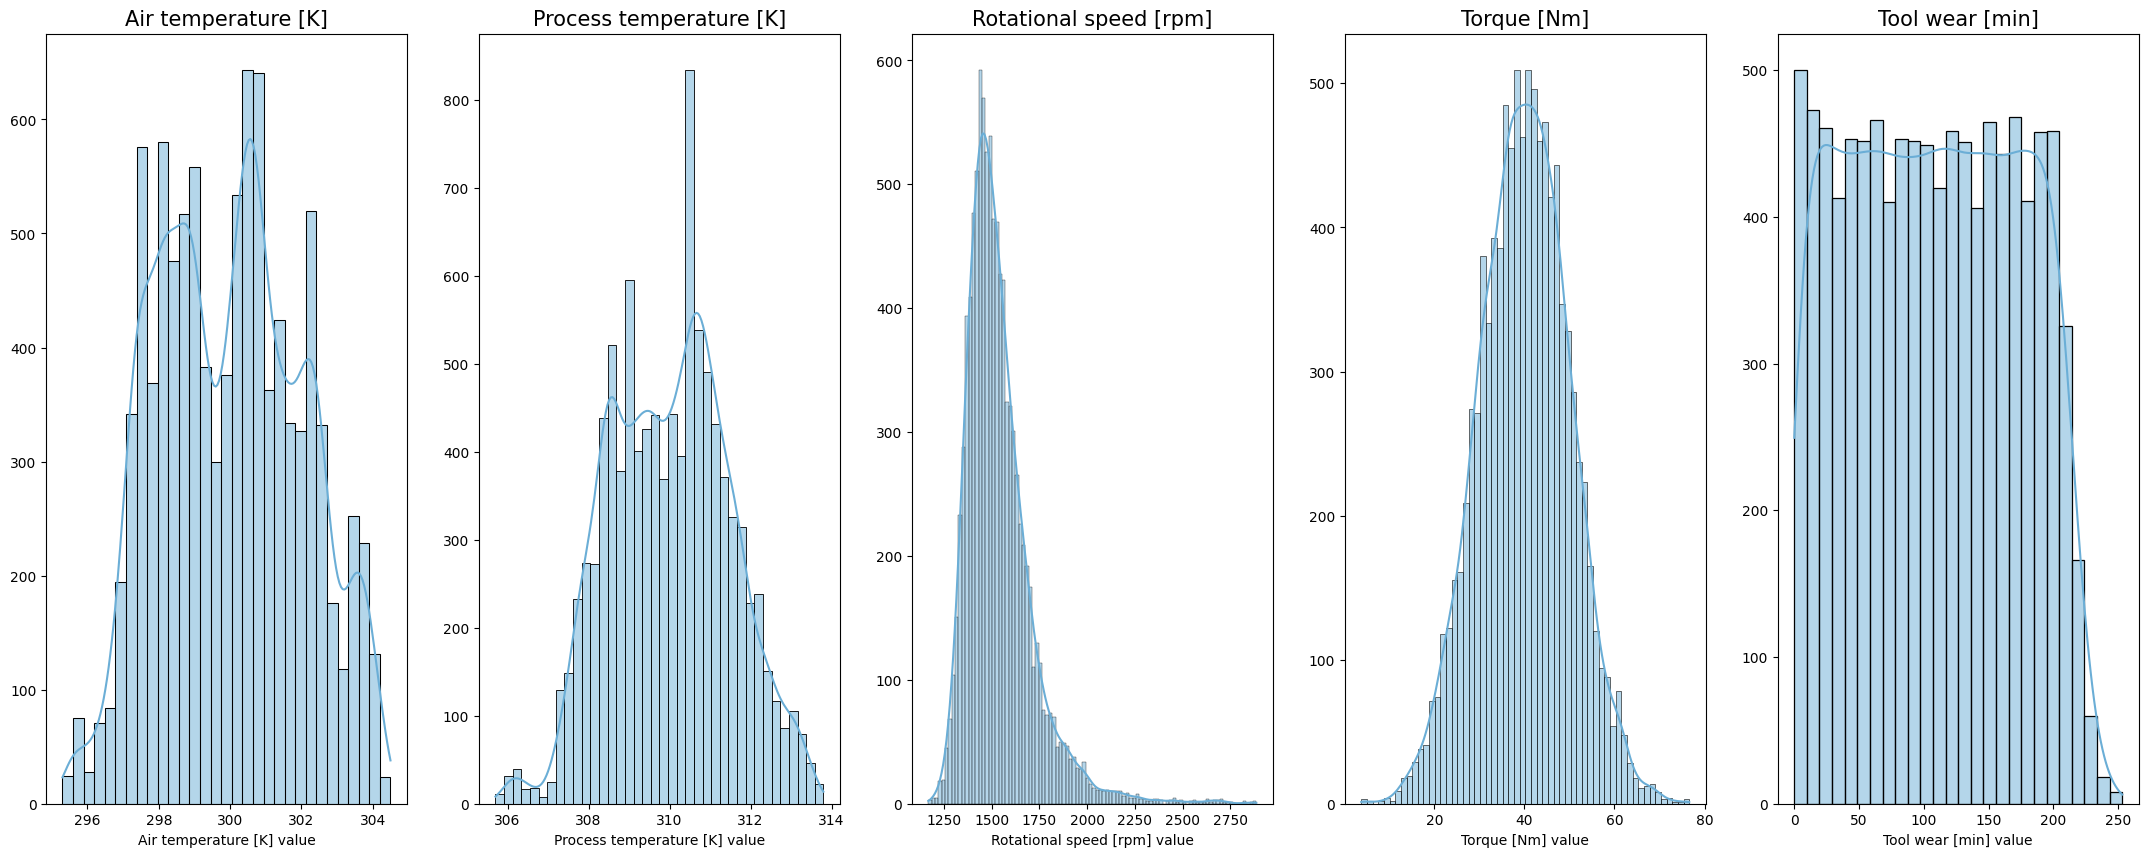

In [13]:
# Visualize distribution of numerical columns

# figure size
plt.figure(figsize = (27 , 10))

# for loop to make histplot to each column
for index , column in enumerate(numerical_columns.columns.tolist()):
    plt.subplot(1 , len(numerical_columns.columns) , index + 1)
    sns.histplot(data = data,
                x = column,
                color = '#6BAED6',
                kde = True)
    plt.title(column , fontsize = 15)
    plt.xlabel(f"{column} value")
    plt.ylabel('')

plt.show()

In [14]:
# identify numerical columns range
num_col=pd.DataFrame({'count':numerical_columns.count(),'min':numerical_columns.min(),'max':numerical_columns.max()}).reset_index().rename(columns={'index':'column name'})

num_col

,column name,count,min,max
0,Air temperature [K],10000,295.3,304.5
1,Process temperature [K],10000,305.7,313.8
2,Rotational speed [rpm],10000,1168.0,2886.0
3,Torque [Nm],10000,3.8,76.6
4,Tool wear [min],10000,0.0,253.0


In [15]:
# identify distribution of binary columns
columns = data[['Machine failure','TWF','HDF','PWF','OSF','RNF']]
for col in columns:
  df=pd.DataFrame({'values':data[col].value_counts(),'percentage of values':(data[col].value_counts()/data[col].count())*100}).reset_index()
  print(df)
  print('======================')

   Machine failure  values  percentage of values
0                0    9661                 96.61
1                1     339                  3.39
   TWF  values  percentage of values
0    0    9954                 99.54
1    1      46                  0.46
   HDF  values  percentage of values
0    0    9885                 98.85
1    1     115                  1.15
   PWF  values  percentage of values
0    0    9905                 99.05
1    1      95                  0.95
   OSF  values  percentage of values
0    0    9902                 99.02
1    1      98                  0.98
   RNF  values  percentage of values
0    0    9981                 99.81
1    1      19                  0.19


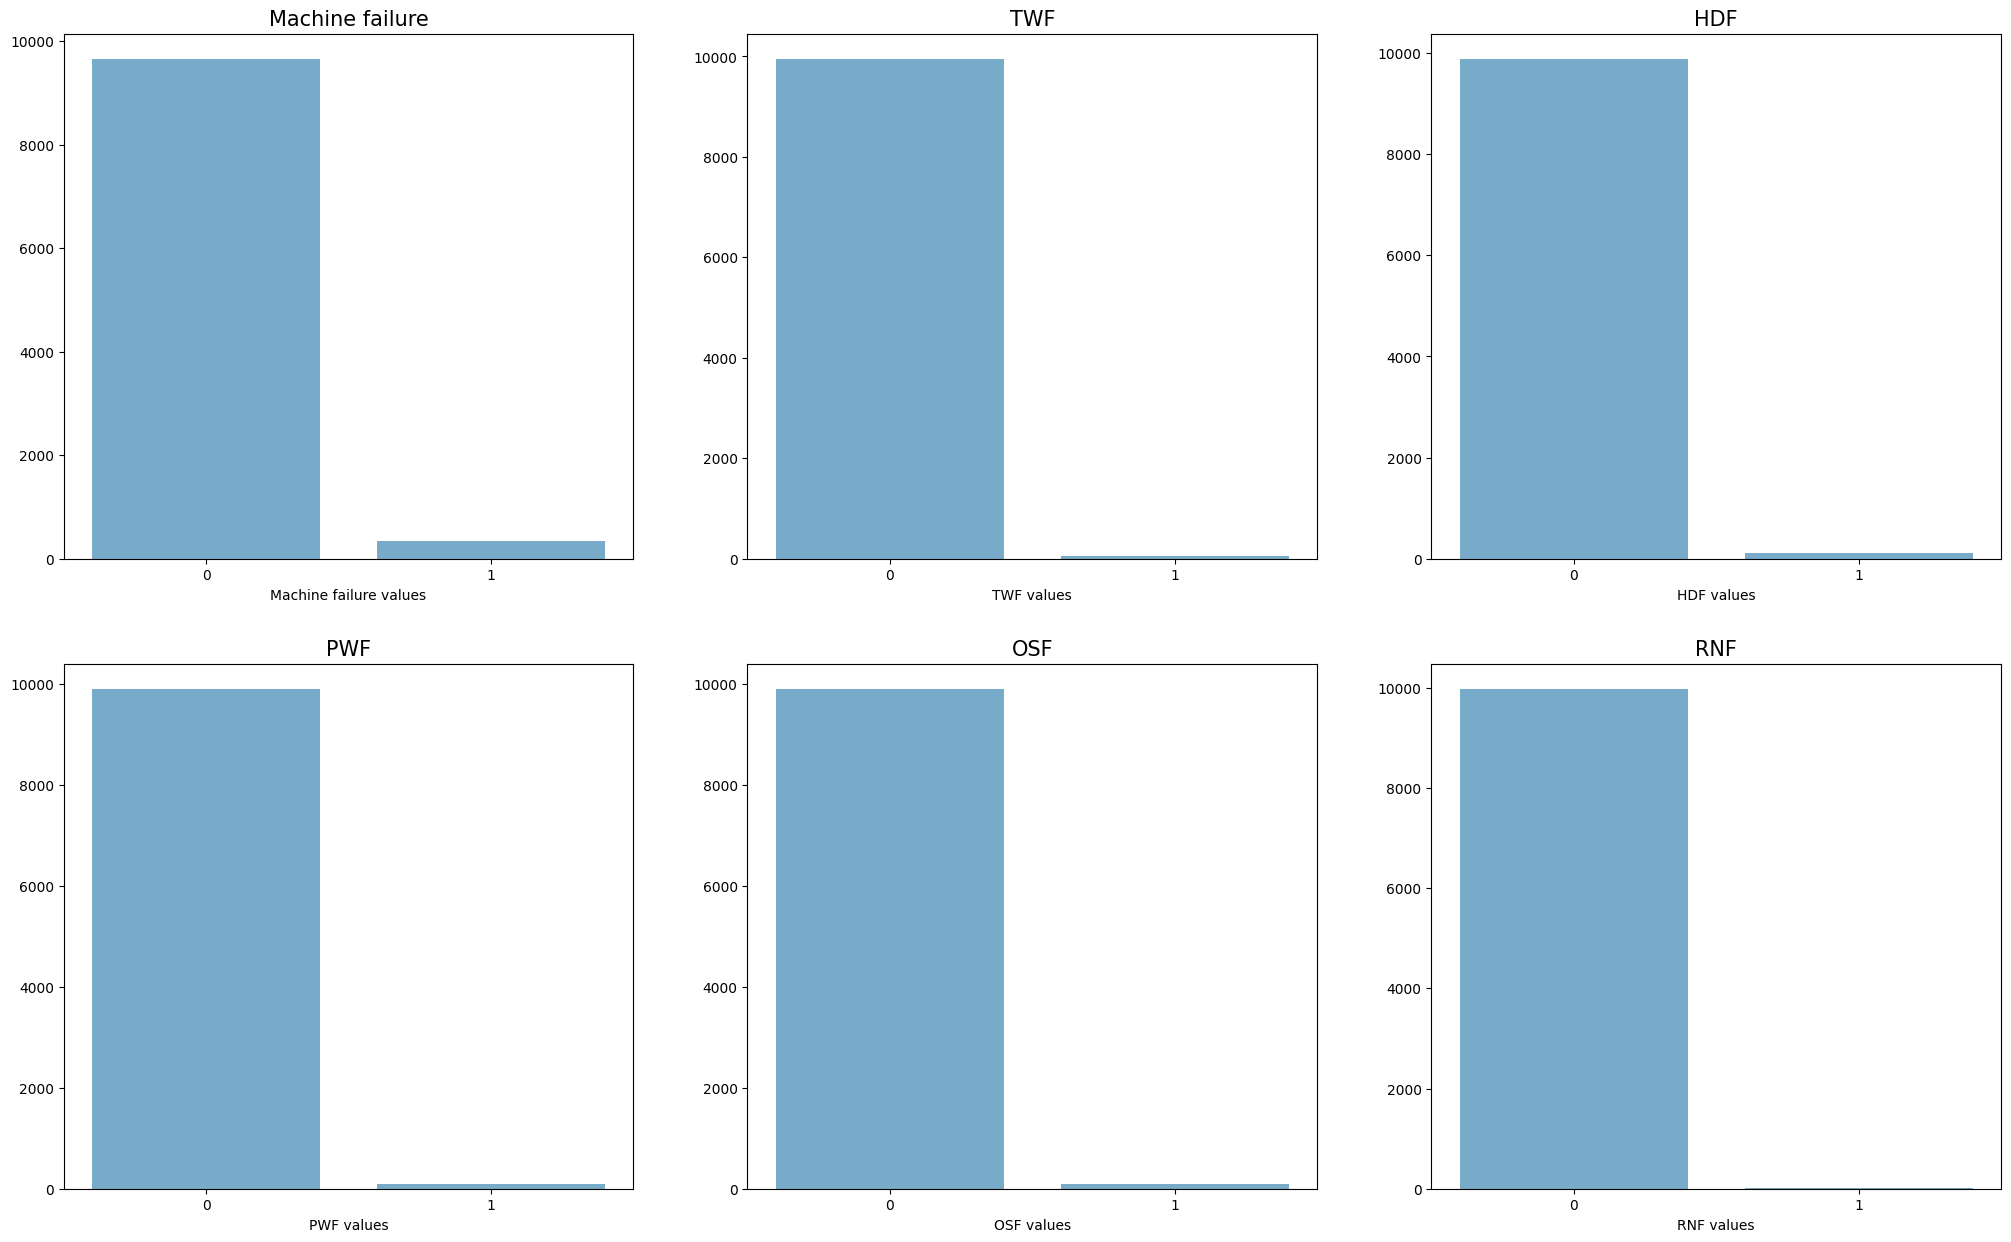

In [16]:
# Visualize categorical failure-related features
# to understand class distribution and detect imbalance in failure types

# Select categorical data
categorical_data = data[['Machine failure',
                           'TWF','HDF','PWF','OSF','RNF']]

# figure size
plt.figure(figsize = (25 , 15))

# for loop to make countplot figure to each column
for index ,  column in enumerate(categorical_data.columns.tolist()):
    plt.subplot(2 , 3 , index + 1)
    sns.countplot(data = data,
                x = column,
                color = '#6BAED6')
    plt.title(column , fontsize = 15)
    plt.xlabel(f"{column} values")
    plt.ylabel('')

plt.show()

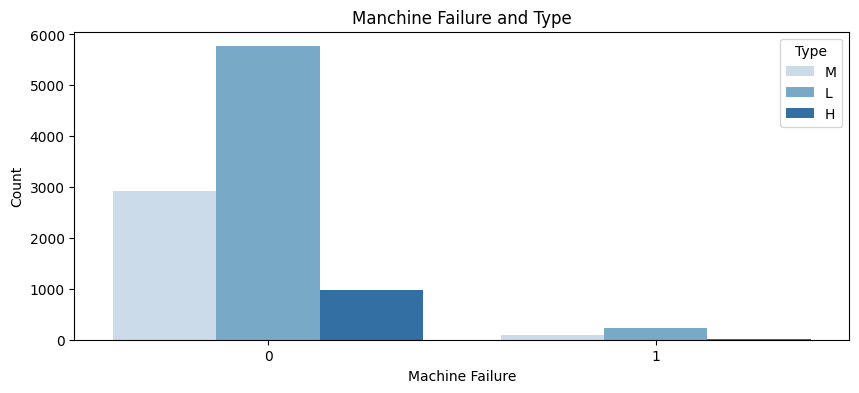

In [17]:
# Simple figure to display distribution of  type in each machine failure status
# Set the figure size
plt.figure(figsize = (10 , 4))

# Create a countplot
sns.countplot(data,
            x = 'Machine failure',
            hue = 'Type',
            palette='Blues')

# Add a title to the plot, label the axes
plt.title('Manchine Failure and Type')
plt.xlabel('Machine Failure')
plt.ylabel('Count')

plt.show()

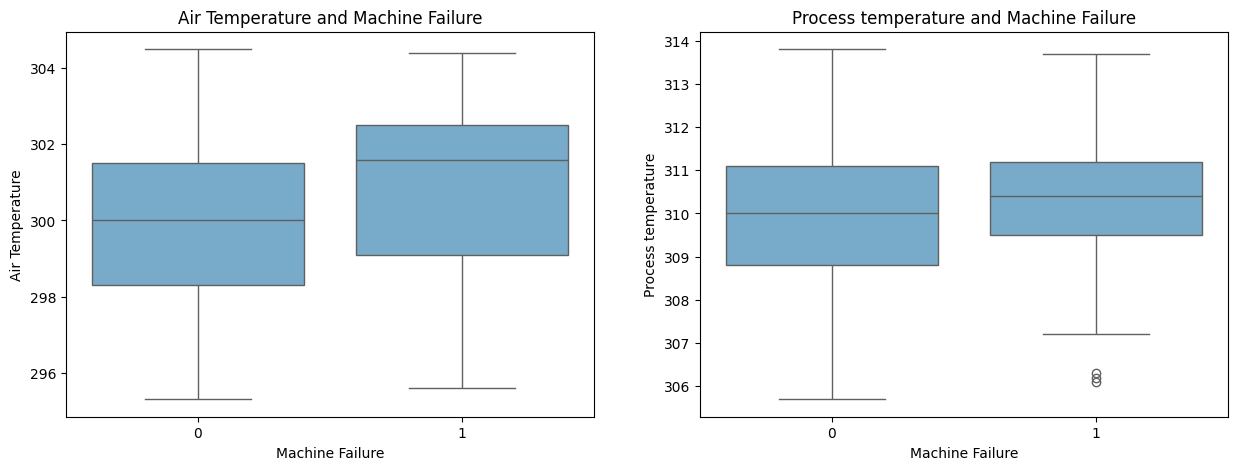

In [18]:
# Visualize how numerical features (Air Temperature and Process Temperature)
# vary across Machine Failure status.

plt.figure(figsize = (15 , 5))

# Boxplot 1: Air Temperature
plt.subplot(1 , 2 , 1)
sns.boxplot(data = data,
            x = 'Machine failure',
            y = 'Air temperature [K]',
            color = '#6BAED6')
plt.title('Air Temperature and Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Air Temperature')

# Boxplot 2: Process Temperature
plt.subplot(1 , 2 , 2)
sns.boxplot(data = data,
            x = 'Machine failure',
            y = 'Process temperature [K]',
            color = '#6BAED6')
plt.title('Process temperature and Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Process temperature')

plt.show()

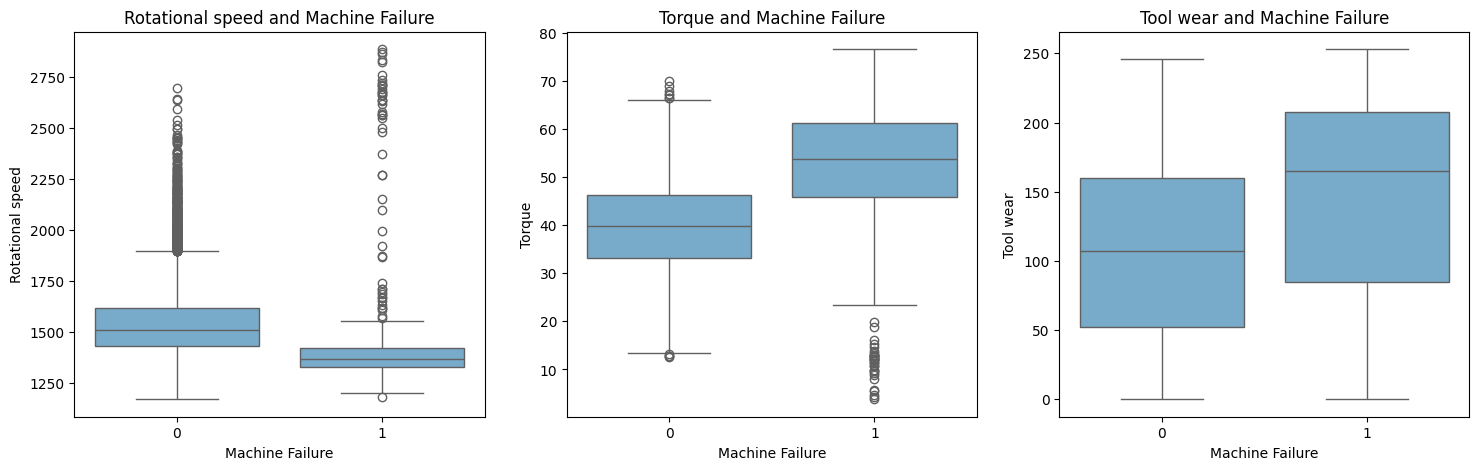

In [19]:
# Visualize how numerical features (Rotational speed , Torque and Tool wear)
# vary across Machine Failure status.

plt.figure(figsize = (18 , 5))

# Boxplot 1: Rotational speed
plt.subplot(1 , 3 , 1)
sns.boxplot(data = data,
            x = 'Machine failure',
            y = 'Rotational speed [rpm]',
            color = '#6BAED6')
plt.title('Rotational speed and Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Rotational speed')

# Boxplot 2: Torque
plt.subplot(1 , 3 , 2)
sns.boxplot(data = data,
            x = 'Machine failure',
            y = 'Torque [Nm]',
            color = '#6BAED6')
plt.title('Torque and Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Torque')

# Boxplot 3: Tool wear
plt.subplot(1 , 3 , 3)
sns.boxplot(data = data,
            x = 'Machine failure',
            y = 'Tool wear [min]',
            color = '#6BAED6')
plt.title('Tool wear and Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Tool wear')

plt.show()

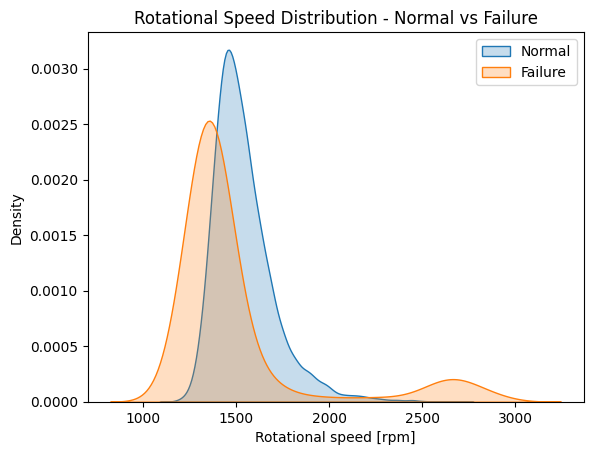

In [20]:
# visualize rotational speed across machine failure

# plot rotational speed for normal cases
sns.kdeplot(data[data['Machine failure'] == 0]['Rotational speed [rpm]'], label='Normal', fill=True)

# plot rotational speed for failure cases
sns.kdeplot(data[data['Machine failure'] == 1]['Rotational speed [rpm]'], label='Failure', fill=True)

# apply legend for interpretability
plt.legend()

# add title for the plot and show it
plt.title('Rotational Speed Distribution - Normal vs Failure')
plt.show()


- This plot indicates that outliers detected from **2500 - 3000** rpm related to **failure** cases and considered **true** **outliers**

- While normal ranges between **~1200 - ~2500** rpm which considered **normal** **ranges** in real cases

- As a result, the outliers here **not** considered **abnormal data**

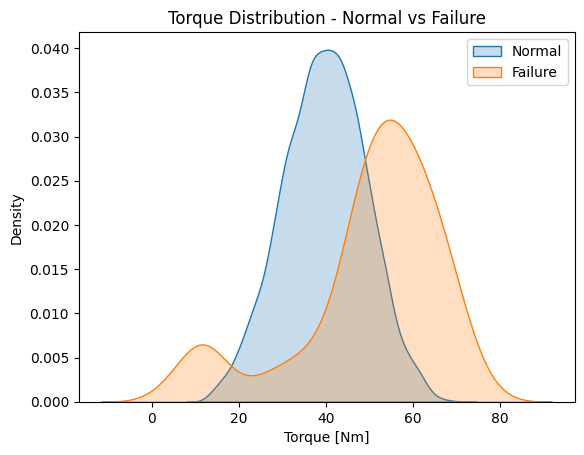

In [21]:
# visualize torque across machine failure

# plot rotational speed for normal cases
sns.kdeplot(data[data['Machine failure'] == 0]['Torque [Nm]'], label='Normal', fill=True)

# plot rotational speed for failure cases
sns.kdeplot(data[data['Machine failure'] == 1]['Torque [Nm]'], label='Failure', fill=True)

# apply legend for interpretability
plt.legend()

# add title for the plot and show it
plt.title('Torque Distribution - Normal vs Failure')
plt.show()


- Also here in torque column, majority values have the range from** 60 - 80 Nm** related to **failure** cases which considered **true outliers**

- And normal cases have ranges between **10 - 50 Nm** and also considered **correct**

- As a result, these outliers will **not** be considered **abnormal**

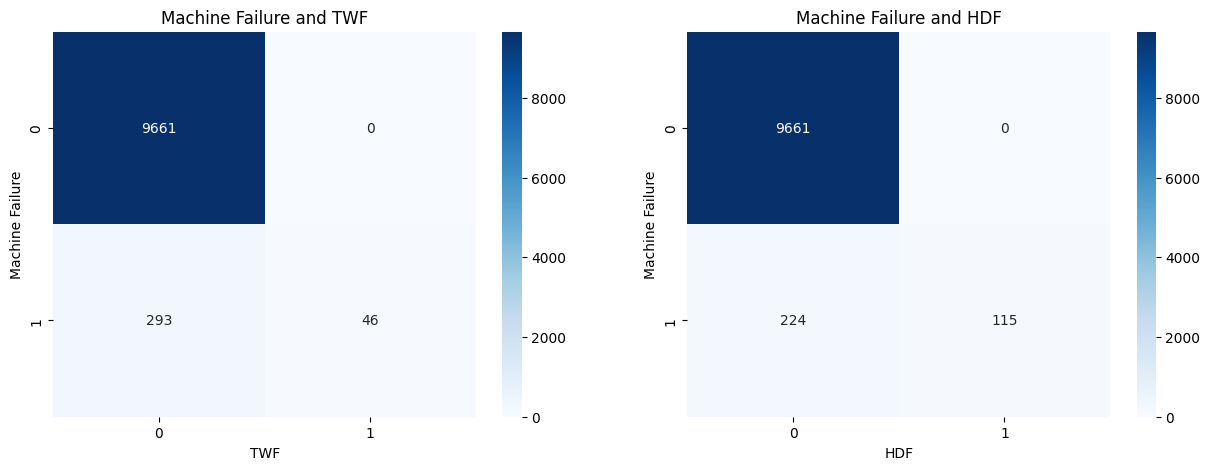

In [22]:
# Visualize the relationship between 'Machine failure'
# and the binary features 'TWF' and 'HDF' using heatmaps.

# Set overall figure size
plt.figure(figsize = (15 , 5))

# Heatmap 1: Machine Failure vs TWF
plt.subplot(1 , 2 , 1)
cross_tab1 = pd.crosstab(index = data['Machine failure'],
                        columns = data['TWF'])
sns.heatmap(cross_tab1,
            annot = True,
            fmt="d",
            cmap="Blues")
plt.title('Machine Failure and TWF')
plt.xlabel('TWF')
plt.ylabel('Machine Failure')

# Heatmap 2: Machine Failure vs HDF
plt.subplot(1 , 2 , 2)
cross_tab2 = pd.crosstab(index = data['Machine failure'],
                        columns = data['HDF'])

sns.heatmap(cross_tab2,
            annot = True,
            fmt="d",
            cmap="Blues")
plt.title('Machine Failure and HDF')
plt.xlabel('HDF')
plt.ylabel('Machine Failure')

plt.show()

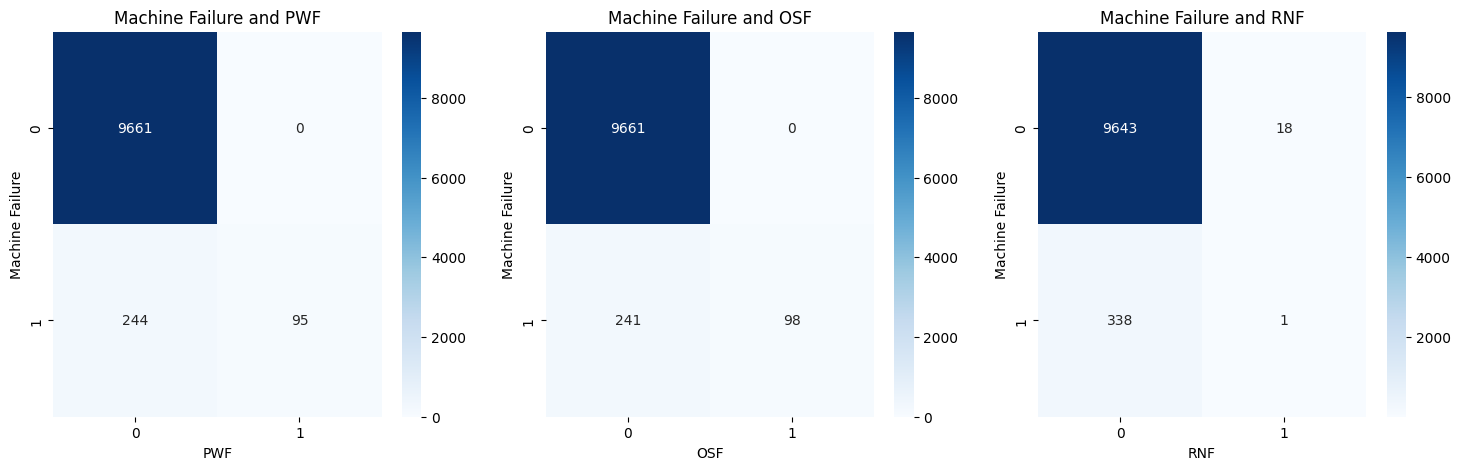

In [23]:
# Visualize the relationship between 'Machine failure'
# and the binary features 'PWF' , 'OSF'  and 'RNF' using heatmaps.

# Set overall figure size
plt.figure(figsize = (18 , 5))

# Heatmap 1: Machine Failure vs PWF
plt.subplot(1 , 3 , 1)
cross_tab1 = pd.crosstab(index = data['Machine failure'],
                        columns = data['PWF'])
sns.heatmap(cross_tab1,
            annot = True,
            fmt="d",
            cmap="Blues")
plt.title('Machine Failure and PWF')
plt.xlabel('PWF')
plt.ylabel('Machine Failure')

# Heatmap 2: Machine Failure vs HDF
plt.subplot(1 , 3 , 2)
cross_tab2 = pd.crosstab(index = data['Machine failure'],
                        columns = data['OSF'])

sns.heatmap(cross_tab2,
            annot = True,
            fmt="d",
            cmap="Blues")
plt.title('Machine Failure and OSF')
plt.xlabel('OSF')
plt.ylabel('Machine Failure')

# Heatmap 3: Machine Failure vs RNF
plt.subplot(1 , 3 , 3)
cross_tab2 = pd.crosstab(index = data['Machine failure'],
                        columns = data['RNF'])

sns.heatmap(cross_tab2,
            annot = True,
            fmt="d",
            cmap="Blues")
plt.title('Machine Failure and RNF')
plt.xlabel('RNF')
plt.ylabel('Machine Failure')

plt.show()

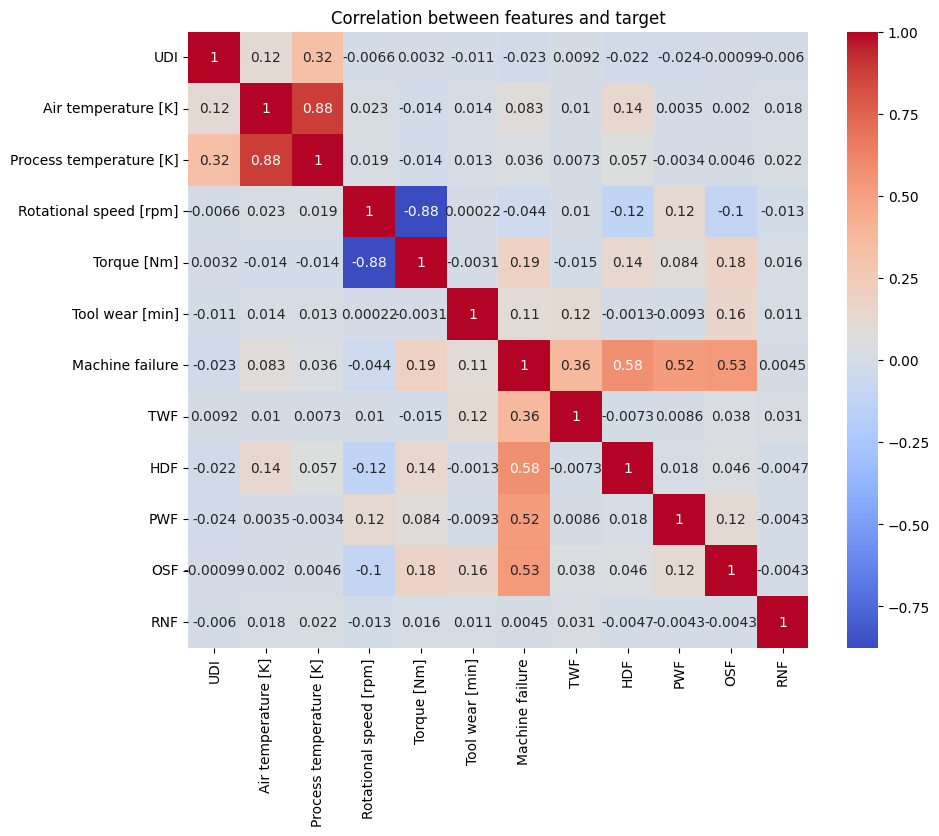

In [24]:
# plot correlation between features (correlation matrix)

# set figure size
plt.figure(figsize=(10,8))

# plot heatmap usiing seaborn
sns.heatmap(data.corr(numeric_only=True),
            annot = True,
            cmap = 'coolwarm')

# set title to the figure and show it
plt.title('Correlation between features and target')
plt.show()

In [25]:
# correlation with target variable
# for feature extraction in Modelling

# build correaltion matrix
corr_matrix=data.corr(numeric_only=True)

# sort correlation coeffecient values with target column
target_corr = corr_matrix['Machine failure'].sort_values(ascending=False)
print(target_corr)

Machine failure            1.000000
HDF                        0.575800
OSF                        0.531083
PWF                        0.522812
TWF                        0.362904
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
RNF                        0.004516
UDI                       -0.022892
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64



---
### 🧭 Exploratory Data Analysis (EDA)

#### Dataset Overview
- **Number of rows:** 10,000  
- **Number of columns:** 14  
- **Memory usage:** ~1.1 MB  
- **Missing values:** None 
- **Data types:**  
  - `float64`: 3 columns  
  - `int64`: 9 columns  
  - `object`: 2 columns  

---

#### Columns Description

| Column | Description | Key Insights |
|--------|--------------|--------------|
| **UDI** | Unique identifier | Will be dropped for modeling |
| **Product ID** | Product identifier | Categorical feature |
| **Type** | Product category (L, M, H) | L dominates (50%+) |
| **Air temperature [K]** | Ambient temperature | Small variation between failure/non-failure |
| **Process temperature [K]** | Process temperature | Small variation between failure/non-failure |
| **Rotational speed [rpm]** | Rotational speed | TRUE outliers = failure indicators |
| **Torque [Nm]** | Torque applied | TRUE outliers = failure indicators |
| **Tool wear [min]** | Tool wear time | Failure: 90–200 min, Non-failure: 50–150 min |
| **Machine failure** | Target variable | Severely imbalanced |
| **TWF, HDF, PWF, OSF, RNF** | Failure type indicators | HDF strongest predictor |

---

#### Data Quality & Balance
- No missing values detected  
- Severe imbalance in **Machine failure**  
- All failure-type columns dominated by `0` values  
- Type **L** dominates product categories (over 50%)  

---

#### Key Relationships & Correlations
- **Air temperature ↔ Process temperature:** Strong positive correlation  
- **Rotational speed ↔ Torque:** Strong negative correlation (domain-related)  
- Medium positive correlation between **Machine failure** and `TWF`, `HDF`, `PWF`, `OSF`  
- **HDF** shows strongest predictive power for machine failure  

---

#### Critical Discovery: Outliers Analysis

##### Rotational Speed [rpm]
- **Normal Range:** ~1200 – ~2500 rpm  
- **Outlier Range:** 2500 – 3000 rpm (**Failure cases**)  
- **Conclusion:** Outliers represent TRUE failure indicators  

##### Torque [Nm]
- **Normal Range:** 10 – 50 Nm  
- **Outlier Range:** 60 – 80 Nm (**Failure cases**)  
- **Conclusion:** Outliers represent TRUE failure indicators  

**Strategic Implication:**  
Outliers will **NOT** be treated as abnormal data.  
They will be converted to meaningful features during **Feature Engineering**.

---

#### Distribution Insights
- `HDF = 1` → `Machine failure = 1` always (perfect correlation)  
- 224 records show `Machine failure = 1` with `HDF = 0` (other failure causes)  
- **HDF** = strongest individual predictor of machine failure  
- Temperature features show minimal separation between failure/non-failure  
- **Tool wear** shows meaningful differentiation (failure cases cluster in higher ranges)  

---

#### Executive Summary

##### Strengths
- Clean, complete dataset (no missing values)  
- Clear domain patterns in feature relationships  
- Outliers provide valuable signal for failure prediction  

##### Challenges
- Severe class imbalance in target and failure indicators  
- Multiple correlated failure types requiring careful feature selection  
- Domain-specific relationships that must be preserved  

---

#### Key Insights
- Outliers are **failure indicators**, not noise  
- **HDF** is the strongest predictor of machine failure  
- **Tool wear** shows predictive patterns worth engineering  
- Temperature features have limited separation power  

---

#### Next Steps
1. **Treat Numerical Outliers →** Convert to new features  
2. **Perform Feature Engineering →** Create outlier flags & feature interactions  

---

## ⚠️ Handle Outliers:

In [26]:
# Define a custom function to categorize torque values into meaningful ranges
def torque_map(value: float) -> int :

  '''
  torque map function to categorize torque values into meaningful ranges to handle outliers

  param value: torque value

  return: integer indicator to describe torque value as
  Normal -> 0
  High -> 2
  Low -> 1

  '''
    # Values below 10 Nm are considered abnormally low → label as 1
  if value < 10:
      return 1
    # Values above 60 Nm are considered high (outlier range) → label as 2
  elif value > 60:
      return 2
    # Values between 10 and 60 Nm are within the normal operating range → label as 0
  else:
      return 0

# Apply the mapping function to create a new feature 'Torque_Flage'
# This feature flags each record based on its torque category (low, normal, or high)
data['Torque_Flage'] = data['Torque [Nm]'].transform(torque_map)


In [27]:
# Define a custom function to categorize Rotational speed values into meaningful ranges
def rational_speed_map(value: int) -> int:
  '''
  Rotational speed map function to categorize Rotational speed values into meaningful ranges to handle outliers

  param value: Rotational speed value

  returns: integer indicator to describe Rotational speed value as
  Normal -> 0
  High -> 2
  Low -> 1

  '''
    # Values below 1200 Nm are considered abnormally low → label as 1
  if value < 1200:
      return 1
    # Values above 2500 Nm are considered high (outlier range) → label as 2
  elif value > 2500:
      return 2
    # Values between 1200 and 2500 Nm are within the normal operating range → label as 0
  else:
      return 0

# Apply the mapping function to create a new feature 'Rotational_Speed_Falge'
# This feature flags each record based on its Rotational speed category (low, normal, or high)
data['Rotational_Speed_Falge'] = data['Rotational speed [rpm]'].transform(rational_speed_map)


## 🎯 Feature Engineering

In [28]:
# Define a custom function to classify tool wear levels based on wear time
def wear_map(value: int) -> int:
  '''
  wear map function to classify tool wear levels into new categories based on wear time

  param value: tool wear time

  returns: integer values to describe tool wear time as
  Low (normal condition) less than 90 -> 0
  Medium between 90 and 150 -> 1
  High (failure condition) greater than 150 -> 2

  '''
    # Tool wear less than 90 minutes → considered low wear (normal condition)
  if value < 90:
      return 0
    # Tool wear greater than 150 minutes → considered high wear (potential failure indicator)
  elif value > 150:
      return 2
    # Tool wear between 90 and 150 minutes → medium wear (transitional stage)
  else:
      return 1

# Apply the mapping function to create a new categorical feature 'Wear_Severity_Level'
# This feature encodes tool wear into three levels: 0 = Low, 1 = Medium, 2 = High
data['Wear_Severity_Level'] = data['Tool wear [min]'].transform(wear_map)

In [29]:
# Create a new feature to measure the temperature difference between process and air
# This represents how much heat is being dissipated during machine operation
data['Heat_Dissipation_Gap'] = data['Process temperature [K]'] - data['Air temperature [K]']

In [30]:
# Create a new feature representing the mechanical power indicator
# Power is approximately proportional to Torque × Rotational Speed
# This helps capture the combined mechanical load or stress on the machine
data['Power_Indicator'] = data['Torque [Nm]'] * data['Rotational speed [rpm]']


---
### 🧠 Feature Engineering Summary

In this phase, new features were created to enhance the model's ability to detect failure patterns and mechanical stress signals.  
Instead of removing outliers, they were **transformed into informative features** that represent machine behavior under different operating conditions.

---

#### 1. Outlier-Based Feature Creation

##### Torque_Flag
- Categorized torque values into **low (1)**, **normal (0)**, and **high (2)** ranges.  
- **Rationale:** High torque values (> 60 Nm) indicate excessive load and potential failure risk.

##### Rotational_Speed_Flag
- Classified rotational speed into **low (1)**, **normal (0)**, and **high (2)** levels.  
- **Rationale:** High rotational speeds (> 2500 rpm) correspond to outlier behavior strongly associated with machine failures.

##### Wear_Severity_Level
- Encoded tool wear time into **Low (0)**, **Medium (1)**, and **High (2)** severity levels.  
- **Rationale:** High wear values (> 150 min) often precede machine failure, while moderate wear (90–150 min) represents transition stages.

---

#### 2. Derived Performance Features

##### Heat_Dissipation_Gap
- Calculated as the difference between **Process temperature** and **Air temperature**.  
- **Formula:**  
  `Heat_Dissipation_Gap = Process temperature [K] - Air temperature [K]`  
- **Purpose:** Captures how much heat the machine dissipates — higher gaps may indicate overheating or inefficiency.

##### Power_Indicator
- Created by multiplying **Torque** and **Rotational speed**.  
- **Formula:**  
  `Power_Indicator = Torque [Nm] × Rotational speed [rpm]`  
- **Purpose:** Represents the **mechanical load intensity** — high power may signal stress conditions that lead to failures.

---

#### Summary Insights
- Outliers were **not removed**, as they represent **true failure indicators**.  
- New features add **mechanical and operational context** to the model.  
- These engineered features will help improve **failure prediction accuracy** by highlighting stress, wear, and thermal patterns.

---

#### Next Step
- **Feature scaling and encoding**
- **Data imbalance handling (e.g., SMOTE, class weights)**
- **Model training and evaluation**

---


## ⚙️ Data Preparation & Balancing:

In [31]:
# Perform one-hot encoding on the 'Type' column
# to convert categorical values into numerical dummy variables
data = pd.get_dummies(data,columns=['Type'])

In [32]:
# Remove identifier and less relevant columns
# to simplify the dataset and focus on key features
data = data.drop(['UDI', 'Product ID', 'Torque [Nm]', 'Rotational speed [rpm]'], axis=1)


---
### 🧹 Data Preparation Summary

During the data preparation phase, the following steps were performed:

1. **Feature Scaling**  
   - Applied `RobustScaler` to the following numerical features:  
     - `Air temperature [K]`  
     - `Process temperature [K]`  
     - `Tool wear [min]`  
   - The `RobustScaler` was chosen because it uses the median and IQR, making it less sensitive to **outliers** compared to standard scaling methods.

2. **Categorical Encoding**  
   - Applied **One-Hot Encoding** to the `Type` column to convert categorical values into numerical format suitable for modeling.

3. **Feature Selection**  
   - Dropped irrelevant or identifier columns that do not contribute to model performance:  
     - `UDI`  
     - `Product ID`  
     - `Torque [Nm]`  
     - `Rotational speed [rpm]`

4. **Flags Columns**  
   - Kept the flag columns as they are, since they already represent binary information useful for modeling.

5. **Handling Class Imbalance**  
   - Will address class imbalance using **class weights** during model training instead of oversampling or undersampling.

---

### Next Steps
The next phase involves:
- Splitting the dataset into **training and testing sets**  
- Building and training the **machine learning model**  
- Evaluating model performance using appropriate metrics
---

## 🤖 Model Development & Evaluation

### 📈 Random Forest

In [33]:
# Split the dataset into features (X) and target (y)
X = data.drop(columns=['Machine failure'], axis=1)
y = data['Machine failure']

# Split data into training and testing sets (80% train, 20% test)
# stratify=y ensures balanced class distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Define the Random Forest classifier with optimized hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# Build a pipeline to combine scaling and model training
# RobustScaler helps reduce the impact of outliers
rf_pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', rf_model)
])


In [34]:
# Apply cross-validation to estimate model performance
# StratifiedKFold maintains class balance across folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_pipe, X_train, y_train, cv=cv, scoring='f1')
print('Average F1 score in cross-validation:', rf_scores.mean())

# Train the final model on the full training data
rf_pipe.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_pipe.predict(X_test)

# Calculate F1 score on the test data
test_score = f1_score(y_test, rf_pred)
print('Test F1 Score:', test_score)

# Evaluate model performance using multiple metrics
print('Accuracy:', accuracy_score(y_test, rf_pred))
print('Precision:', precision_score(y_test, rf_pred))
print('Recall:', recall_score(y_test, rf_pred))
print('F1 Score:', f1_score(y_test, rf_pred))

# Compute and print ROC AUC score
print('ROC AUC Score:', roc_auc_score(y_test, rf_pipe.predict_proba(X_test)[:, 1]))


Average F1 score in cross-validation: 0.9868436928250013
Test F1 Score: 0.9850746268656716
Accuracy: 0.999
Precision: 1.0
Recall: 0.9705882352941176
F1 Score: 0.9850746268656716
ROC AUC Score: 0.9955699671172816


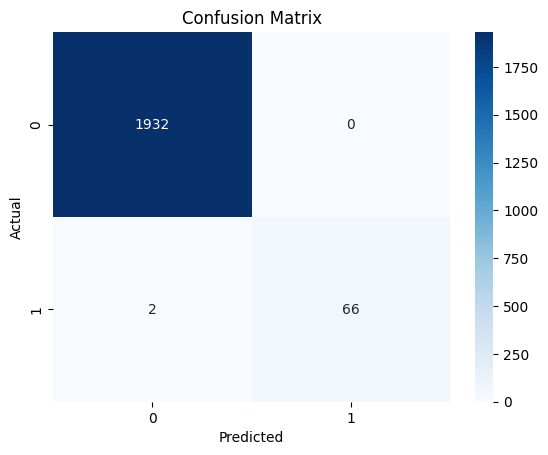

In [35]:
# Visualize confusion matrix as a heatmap
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

    n_estimators=200,            -> number of trees (too high → slower, too low → underfit)
    max_depth=10,                -> controls overfitting (None = full depth = high overfit risk)
    min_samples_split=10,        -> min samples to split an internal node
    min_samples_leaf=5,          -> min samples per leaf node
    max_features='sqrt',         -> limit features per split
    class_weight='balanced',     -> handle class imbalance
    random_state=42,
    n_jobs=-1                    -> use all cores

<Figure size 800x600 with 0 Axes>

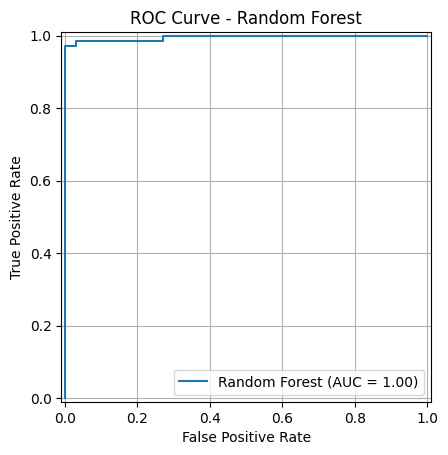

In [36]:
# Plot ROC curve for the Random Forest model

# Get predicted probabilities for the positive class (1)
rf_pred_proba = rf_pipe.predict_proba(X_test)[:, 1]

# Create and display the ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(rf_pipe, X_test, y_test, name='Random Forest')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


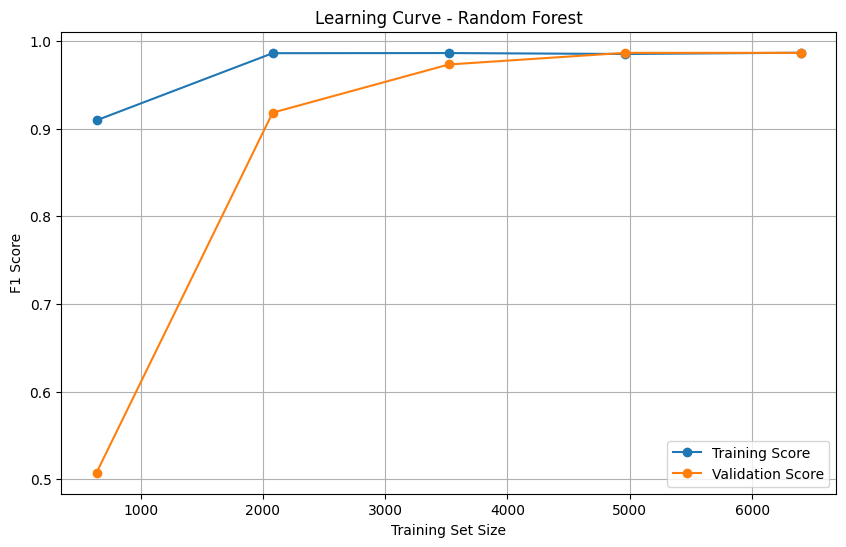

In [37]:
# Plot the learning curve for the Random Forest model

# Compute training and validation scores for different training set sizes
train_sizes, train_scores, val_scores = learning_curve(
    rf_pipe, X_train, y_train, cv=5, scoring='f1'
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Visualize the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation Score')

# Add plot details
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


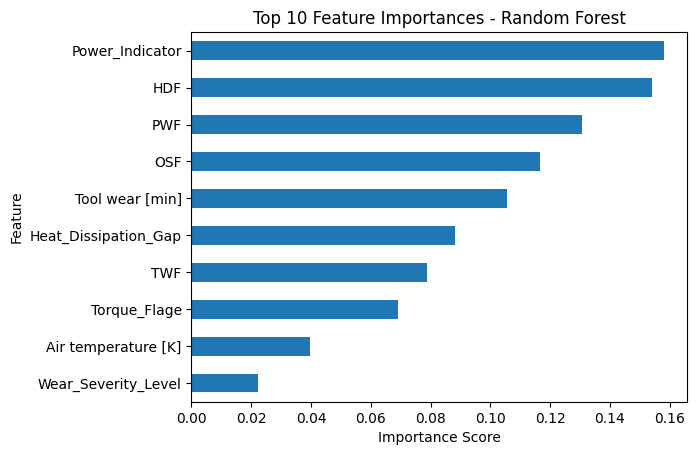

In [38]:
# Plot feature importance for the Random Forest model

# Get feature importance scores from the trained Random Forest model
feat_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Plot the top 10 most important features
feat_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


### 📈 XGBoost

average f1 score in cv: 0.9850108087279661
Test score: 0.9850746268656716
Accuracy: 0.999
Precision: 1.0
Recall: 0.9705882352941176
F1 Score: 0.9850746268656716
ROC AUC Score: 0.9919696139325296


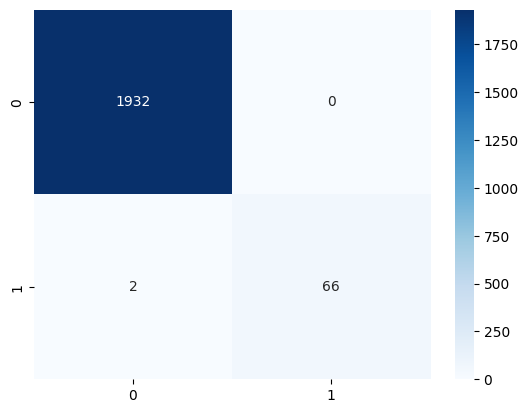

In [45]:
# apply xgboost model
xgb_model = XGBClassifier(n_estimators=300,
                          learning_rate=0.05,
                          max_depth=5,
                          min_child_weight=5,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          gamma=0.2,
                          reg_lambda=1.0,
                          reg_alpha=0.5,
                         scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train),
                         random_state=42,
                         n_jobs=-1,
                         eval_metric='logloss'
)

# apply pipeline to avoid overfitting
xg_pipe=Pipeline([('scaler',RobustScaler()),('classifier',xgb_model)])

# cross validation step
cv = StratifiedKFold(n_splits=5, 
                     shuffle=True, 
                     random_state=42)
xg_scores = cross_val_score(xg_pipe, X_train, y_train, cv=cv, scoring='f1')
print('average f1 score in cv:',xg_scores.mean())

# train final model
xg_pipe.fit(X_train, y_train)
xg_pred = xg_pipe.predict(X_test)
test_score=f1_score(y_test,xg_pred)
print('Test score:',test_score)

# evaluation metrics
print('Accuracy:', accuracy_score(y_test, xg_pred))
print('Precision:', precision_score(y_test, xg_pred))
print('Recall:', recall_score(y_test, xg_pred))
print('F1 Score:', f1_score(y_test,xg_pred))
print('ROC AUC Score:', roc_auc_score(y_test, xg_pipe.predict_proba(X_test)[:, 1]))

sns.heatmap(confusion_matrix(y_test,xg_pred),annot=True,fmt='d',cmap='Blues')
plt.show()


    n_estimators=300,            -> number of boosting rounds
    learning_rate=0.05,          -> smaller → slower but more generalizable
    max_depth=5,                 -> control tree depth
    min_child_weight=5,          -> prevent overfitting on small leaves
    subsample=0.8,               -> use 80% of rows per tree
    colsample_bytree=0.8,        -> use 80% of features per tree
    gamma=0.2,                   -> minimum loss reduction for a split
    reg_lambda=1.0,              -> L2 regularization
    reg_alpha=0.5,               -> L1 regularization
    scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train),  -> handle imbalance

<Figure size 800x600 with 0 Axes>

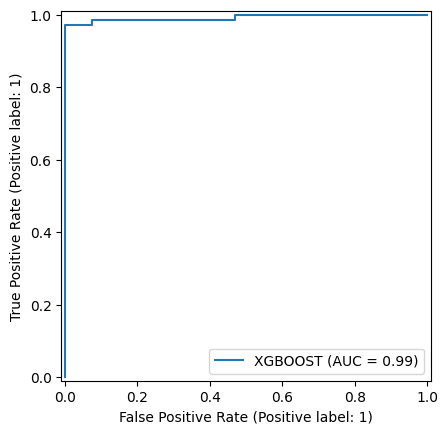

In [40]:
# plot roc curve for xgboost
xg_pred_proba = xg_pipe.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8,6))
RocCurveDisplay.from_estimator(xg_pipe, X_test, y_test, name='XGBOOST')
plt.show()

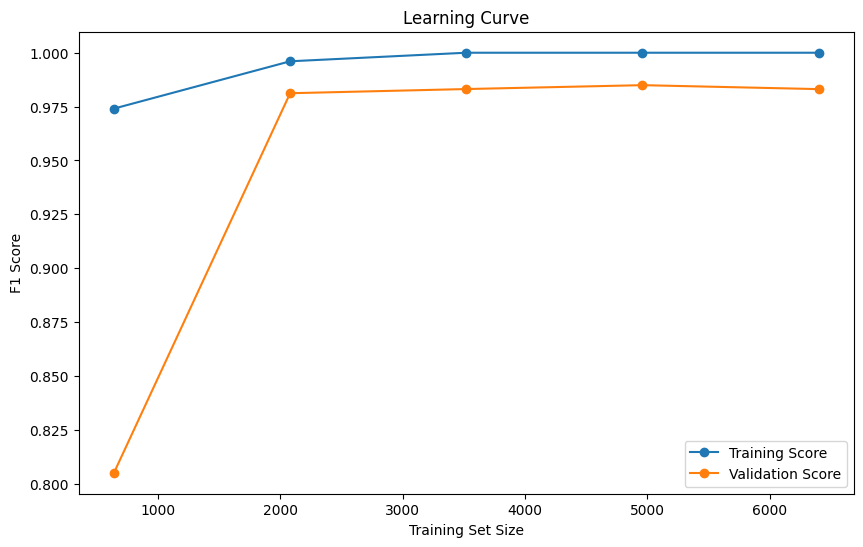

In [46]:
# plot learning curve for xgboost
train_sizes, train_scores, val_scores = learning_curve(xg_pipe, X_train, y_train, cv=5, scoring='f1')
train_scores_mean=np.mean(train_scores,axis=1)
train_scores_std=np.std(train_scores,axis=1)
val_scores_mean=np.mean(val_scores,axis=1)
val_scores_std=np.std(val_scores,axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes,train_scores_mean,'o-',label='Training Score')
plt.plot(train_sizes,val_scores_mean,'o-',label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()



---


## 🚀 Deployment

In [42]:
# Save the trained pipeline (model + preprocessing) to a .joblib file
joblib.dump(rf_pipe, "model_rf_pipeline.joblib")

# Extract the feature column names used during training
cols = list(X.columns)

# Save the column names to a JSON file for use during prediction
with open("cols.json", "w") as f:
    json.dump(cols, f)

In [43]:
# Path where the trained model pipeline will be saved
MODEL_PATH = "model_rf_pipeline.joblib"

# Save the trained pipeline (model + preprocessing steps)
joblib.dump(rf_pipe, MODEL_PATH)

# Confirm that the model was saved successfully
print(f"Model saved to {MODEL_PATH}")


Model saved to model_rf_pipeline.joblib


In [44]:
# Path to the JSON file where feature column names will be stored
COLS_PATH = "cols.json"

# Get the list of feature column names used during training
columns = X_train.columns.tolist()

# Save the column names to a JSON file for future reference during prediction
with open(COLS_PATH, "w") as f:
    json.dump(columns, f)

# Confirm that the column names were saved successfully
print(f"Columns saved to {COLS_PATH}")



Columns saved to cols.json
